# GPs w. Uncertain Inputs

In [7]:
(np.ones(1) * np.ones(shape=X.shape)).shape

(500, 1)

In [9]:
import os, sys
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
sys.path.insert(0, parent_dir) 

import numpy as np
from uncertain import SparseGPR
import GPy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 1.0
input_noise = .3
n_train = 500
n_test = 10_000
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)

X += input_noise * rng.randn(X.shape[0], X.shape[1])
y += noise * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, n_test)[:, None]
X_plot += input_noise * rng.randn(X_plot.shape[0], X_plot.shape[1])
X_plot = np.sort(X_plot)

In [78]:
def plot_results():
    # Plot results
    plt.figure(figsize=(10, 5))
    lw = 2
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')

    plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
             label='GPR' )
    plt.fill_between(X_plot[:, 0], 
                     (y_gpr - y_std).squeeze(), 
                     (y_gpr + y_std).squeeze(), color='darkorange',
                     alpha=0.2)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.xlim(0, 20)
    plt.ylim(-4, 4)
    plt.title('GPR versus Kernel Ridge')
    plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
    plt.show()

### Sparse GP Model - No Uncertain Inputs

In [79]:
n_inducing = 10
inference = 'vfe'
X_variance = None

gpr_clf = SparseGPR(
    verbose=None, n_restarts=10,
    n_inducing=n_inducing,
    inference=inference,
    X_variance=X_variance
)

gpr_clf.fit(X, y);

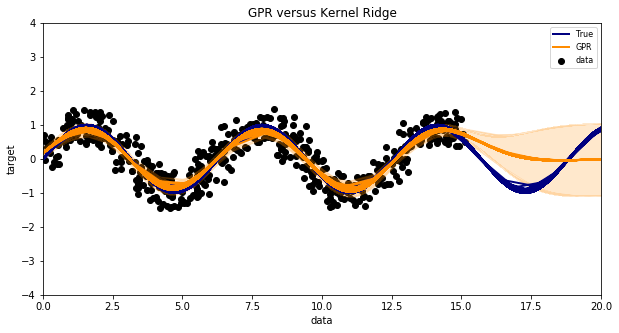

In [80]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

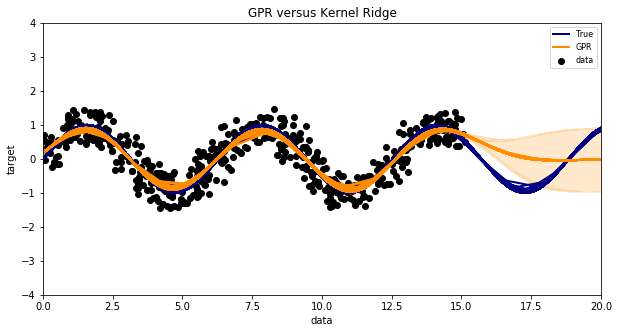

In [82]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

### W. Uncertain Inputs

In [83]:
n_inducing = 10
inference = 'vfe'
X_variance = input_noise

gpr_clf = SparseGPR(
    verbose=None, n_restarts=10,
    n_inducing=n_inducing,
    inference=inference,
    X_variance=X_variance
)

gpr_clf.fit(X, y);

 /Users/eman/anaconda3/envs/sci_py36/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:131: RuntimeWarning:invalid value encountered in true_divide


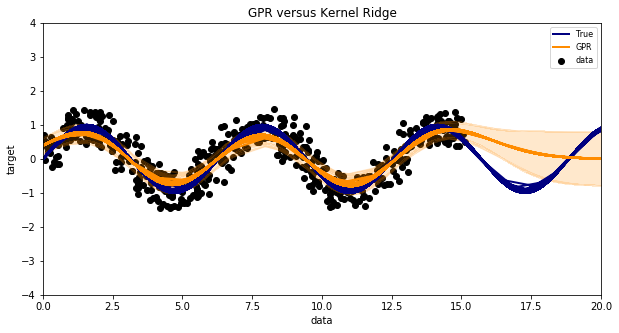

In [84]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

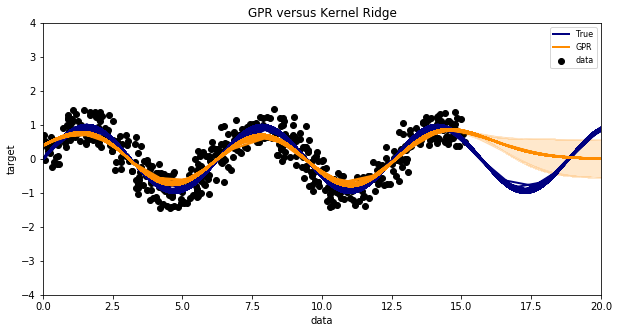

In [85]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()